## WeatherPy

### Analysis

* Maximum temperature is higher in places near 18 degrees latitude (based of the tilt of the earth during the summer)
* Humidity is highest in near the equator. I believe this is explained by most of the continents having shores near the equator.
* Location on the latitude plane has no correlation for the cloudiness or wind speed. Cloudiness is well distributed among all ranges of latitude, while wind speed in fairly constant with outliers sporadically throughout the latitudes

In [1]:
import csv
import numpy
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint
from config import weather_api_key

In [2]:
# api setting
settings = {"units": "imperial", "appid": weather_api_key}

In [3]:
# current date
now = datetime.datetime.now()
current_day = now.strftime("%m/%d/%Y")
current_day

'05/31/2018'

In [4]:
# unix time
start_time = int(time.time())

In [5]:
cities = []
countries = []
date = []
lat = []
lng = []
temp_max = []
humid = []
cloud = []
wind = []

In [7]:
# to calculate the 500 random latitude and longitude


while len(cities) <500:
    ran_lat = numpy.random.randint(low=-90,high=90)
    ran_long = numpy.random.randint(low=-180,high=180) 
    city = citipy.nearest_city(ran_lat, ran_long)
    city = city.city_name
    if city in cities:
        continue
    else:
        try:
            current_weather_city = owm.get_current(city, **settings)
            # pprint(current_weather_city)
            cities.append(city)
            countries.append(current_weather_city["sys"]["country"])
            date.append(int(time.time()))
            lat.append(current_weather_city["coord"]["lat"])
            lng.append(current_weather_city["coord"]["lon"])
            temp_max.append(current_weather_city["main"]["temp_max"])
            humid.append(current_weather_city["main"]["humidity"])
            cloud.append(current_weather_city["clouds"]["all"])
            wind.append(current_weather_city["wind"]["speed"])
        except:
            continue

In [8]:
Weather_df = pd.DataFrame({"City": cities, "County": countries, "Date": date, "Latitude": lat, "Max Temp (F)": temp_max, "Humidity": humid, "Cloudiness": cloud, "Wind Speed": wind })
Weather_df.head()
Weather_df.to_csv(f"Weather_Data_{start_time}.csv")

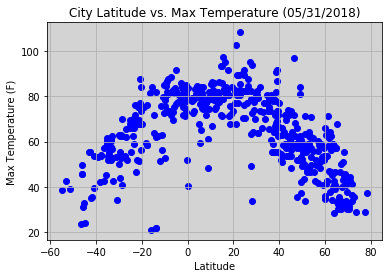

In [9]:
# Temp scatter plot
fig, ax = plt.subplots()
plt.scatter(lat,temp_max, color= "b")
plt.grid()
ax.set_facecolor("lightgrey")

plt.title(f"City Latitude vs. Max Temperature ({current_day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("LatvTemp.png")

plt.show()

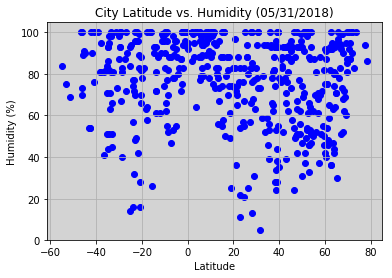

In [10]:
# Temp scatter plot
fig, ax = plt.subplots()
plt.scatter(lat,humid, color= "b")
plt.grid()
ax.set_facecolor("lightgrey")

plt.title(f"City Latitude vs. Humidity ({current_day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatvHumid.png")

plt.show()

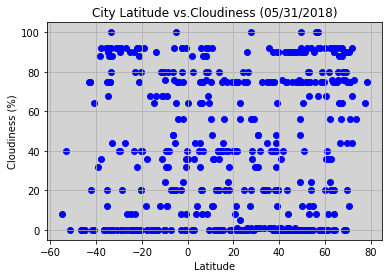

In [11]:
# Temp scatter plot
fig, ax = plt.subplots()
plt.scatter(lat,cloud, color= "b")
plt.grid()
ax.set_facecolor("lightgrey")

plt.title(f"City Latitude vs.Cloudiness ({current_day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatvCloud.png")

plt.show()

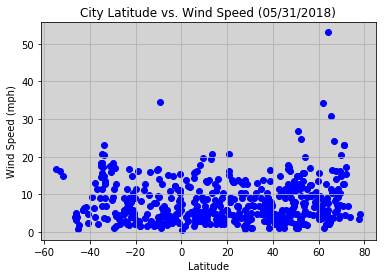

In [12]:
# Temp scatter plot
fig, ax = plt.subplots()
plt.scatter(lat,wind, color= "b")
plt.grid()
ax.set_facecolor("lightgrey")

plt.title(f"City Latitude vs. Wind Speed ({current_day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LatvWind.png")

plt.show()